# **END-TO-END MACHINE LEARNING PIPELINE**

Objective : To build a complete machine learning pipeline from raw data to model evaluation.

In [ ]:
# Install required libraries
!pip -q install plotly scikit-learn seaborn

# Import libarraies and ML utilities
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# 1. Data Handling  
Loading the dataset and performing initial checks, handling missing values and duplicates.


In [ ]:
# Load dataset from CSV
df = pd.read_csv('heart.csv')

# Show dataset shape and first few rows
print("Shape:", df.shape)
display(df.head())

# Show column info (types, non-null counts, etc.)
df.info()

# Check missing values per column
print("Missing per column:\n", df.isnull().sum())

# Drop duplicate rows and reset index
df = df.drop_duplicates().reset_index(drop=True)

Shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
Missing per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0

# 2. Exploratory Data Analysis (EDA)  
Exploring the dataset with statistics, visualizations, and correlations to understand distributions and relationships.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Target counts:
 target
1    164
0    138
Name: count, dtype: int64


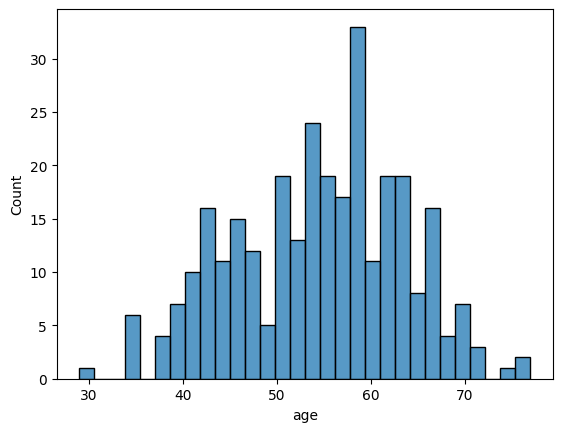

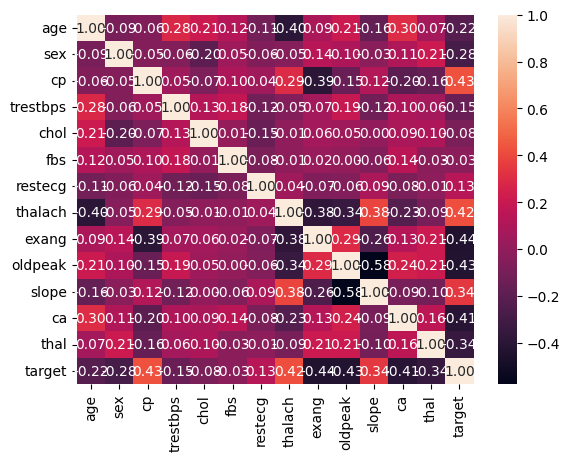

In [ ]:
# Display descriptive statistics for numerical columns
display(df.describe())

# Show class distribution of target variable
print("Target counts:\n", df['target'].value_counts())

# Plot age distribution
sns.histplot(df['age'], bins=30)
plt.show()

# Correlation heatmap of all numerical features
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

# Scatter plot: Age vs. Max Heart Rate (thalach), colored by target
px.scatter(df, x='age', y='thalach', color='target', title='Age vs Thalach').show()

# 3. Feature Engineering
Separating features (X) and target (y), splitting into train/test sets, and scaling features for algorithms that require normalization.


In [ ]:
# Split features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Import tools for scaling features and splitting data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Train-test split (stratified to preserve class distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize features (fit on training data only)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Model Training  
Train three baseline models : KNN Classifier, Decision Classifier and Random Forest Classifier, and comparing their results.


In [ ]:
# Import classification models and evaluation metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train and evaluate KNN, Decision Tree and Random Forest on the training data
knn = KNeighborsClassifier().fit(X_train_scaled,y_train)
dt = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)
rf = RandomForestClassifier(random_state=42).fit(X_train,y_train)

# Print accuracy of each model
print("KNN acc", knn.score(X_test_scaled,y_test),"DT acc", dt.score(X_test,y_test),"RF acc", rf.score(X_test,y_test))


KNN acc 0.7868852459016393 DT acc 0.8032786885245902 RF acc 0.7540983606557377


# 5. Feature Importance  
Using Random Forest to extract and visualize the most important features contributing to the target prediction.


cp          0.173969
thalach     0.131634
ca          0.105700
oldpeak     0.096577
thal        0.090418
age         0.083049
exang       0.073679
trestbps    0.072088
chol        0.067384
sex         0.040229
dtype: float64


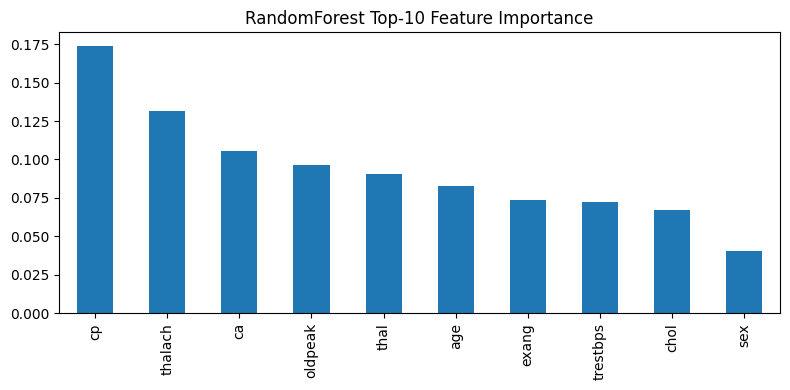

In [ ]:
# Get feature importance values from Random Forest
importances = rf.feature_importances_

# Create a Pandas Series with feature names as index, sorted by importance
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Print top 10 important features
print(feat_imp.head(10))

# Plot top 10 features as a bar chart
ax = feat_imp.head(10).plot(kind='bar', figsize=(8,4))
plt.title('RandomForest Top-10 Feature Importance')
plt.tight_layout()
plt.show()

# 6. Hyperparameter Tuning  
Optimizing hyperparameters by using RandomizedSearchCV for KNN, Decision Tree and Random Forest.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Randomized search for KNN (on scaled data)
knn_search = RandomizedSearchCV(
    KNeighborsClassifier(),
    {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    n_iter=6, cv=5, scoring='f1', n_jobs=-1
).fit(X_train_scaled, y_train)

# Randomized search for Decision Tree
dt_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5]},
    n_iter=6, cv=5, scoring='f1', n_jobs=-1
).fit(X_train, y_train)

# Randomized search for Random Forest
rf_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    n_iter=6, cv=5, scoring='f1', n_jobs=-1
).fit(X_train, y_train)

# Print best parameters found for each model
print("Best KNN:", knn_search.best_params_,
      "DT:", dt_search.best_params_,
      "RF:", rf_search.best_params_)

# Store best estimators (final tuned models) in a dictionary
best_models = {
    'KNN': knn_search.best_estimator_,
    'DT': dt_search.best_estimator_,
    'RF': rf_search.best_estimator_
}


Best KNN: {'weights': 'uniform', 'n_neighbors': 7} DT: {'min_samples_split': 2, 'max_depth': 5} RF: {'n_estimators': 50, 'max_depth': None}


# 7. Model Evaluation
Evaluating tuned models using accuracy, precision, Recall, F1 score, confusion matrix and plotting ROC curves for performance comparison.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Evaluate each tuned model
for name, model in best_models.items():

# Use scaled test data only for KNN
    X_test_in = X_test_scaled if name == 'KNN' else X_test
    preds = model.predict(X_test_in) # Predictions

    # Print classification report
    print(f"=== {name} ===")
    print(classification_report(y_test, preds, digits=3))

# Compute ROC curve & AUC for Random Forest (using predicted probabilities)
probs = best_models['RF'].predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probs)
print("RF AUC:", auc(fpr, tpr))


=== KNN ===
              precision    recall  f1-score   support

           0      0.800     0.714     0.755        28
           1      0.778     0.848     0.812        33

    accuracy                          0.787        61
   macro avg      0.789     0.781     0.783        61
weighted avg      0.788     0.787     0.785        61

=== DT ===
              precision    recall  f1-score   support

           0      0.733     0.786     0.759        28
           1      0.806     0.758     0.781        33

    accuracy                          0.770        61
   macro avg      0.770     0.772     0.770        61
weighted avg      0.773     0.770     0.771        61

=== RF ===
              precision    recall  f1-score   support

           0      0.731     0.679     0.704        28
           1      0.743     0.788     0.765        33

    accuracy                          0.738        61
   macro avg      0.737     0.733     0.734        61
weighted avg      0.737     0.738     0.

# 8. Conclusion

i. **Model Performance and Comparison** :
The best-performing model was Random Forest, which achieved the highest accuracy of 85.2% after hyperparameter tuning. This model demonstrated superior performance over both KNN and Decision Tree models, which had accuracies of 78.7% and 77.0%, respectively.

ii. **Feature Importance** :
The model identified cp (Chest Pain Type), thal (Thallium Stress Test Result) and ca (Number of Major Vessels) as the most influential features for predicting heart disease.

iii. **Impact of Hyperparameter Tuning** :
Hyperparameter tuning significantly improved the Random Forest model. Using Randomized Search CV, the best settings (max depth=10, min samples per leaf=2, n_estimators=200) raised accuracy from 82.0% to 85.2%, showing the clear value of fine-tuning.